# Visualization in python

Python has many visualization libraries. See this link: https://www.anaconda.com/python-data-visualization-2018-why-so-many-libraries/.

Some of them are domain specfic like [pastalog](https://github.com/rewonc/pastalog) for neural network visualization. We will cover **matplotlib**, a generic visualization library and a small portion of **seaborn** for statistical visualization.

# [Matplotlib](https://matplotlib.org/)

It is a widely used visualization library in python. As shown in above link, many other libraries (**pandas etc.**) depend on on matplotlib for visualization part. It is a massive library with extensive documentation.




[John D Hunter](https://en.wikipedia.org/wiki/John_D._Hunter) started matplotlib during post-doctoral research in neurobiology.

Here is link to his talk [matplotlib: Lessons from middle age](https://www.youtube.com/watch?v=e3lTby5RI54) at scipy 2012

%pylab: matplotlib  has a connection with MATLAB.pylab provides a MATLAB like interface for plotting.

Check this page for a warning.

https://matplotlib.org/users/shell.html#ipython-to-the-rescue

# Matplotlib structure

Everything in matplotlib is a hierarchy of nested objects.

- **figure** is the outermost object
    + It contains multiple **Axes** objects (plots)

In [1]:
# install it if required
!pip install matplotlib

# Anatomy of figures

<img height="500" width="700" src="https://matplotlib.org/_images/anatomy.png">

In [2]:
import matplotlib.pyplot as plt
# to inline the graphics in notebook
%matplotlib inline 

In [3]:
help(plt.subplots)

Help on function subplots in module matplotlib.pyplot:

subplots(nrows: 'int' = 1, ncols: 'int' = 1, *, sharex: "bool | Literal['none', 'all', 'row', 'col']" = False, sharey: "bool | Literal['none', 'all', 'row', 'col']" = False, squeeze: 'bool' = True, width_ratios: 'Sequence[float] | None' = None, height_ratios: 'Sequence[float] | None' = None, subplot_kw: 'dict[str, Any] | None' = None, gridspec_kw: 'dict[str, Any] | None' = None, **fig_kw) -> 'tuple[Figure, Any]'
    Create a figure and a set of subplots.
    
    This utility wrapper makes it convenient to create common layouts of
    subplots, including the enclosing figure object, in a single call.
    
    Parameters
    ----------
    nrows, ncols : int, default: 1
        Number of rows/columns of the subplot grid.
    
    sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
        Controls sharing of properties among x (*sharex*) or y (*sharey*)
        axes:
    
        - True or 'all': x- or y-axis wil

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._axes.Axes'>


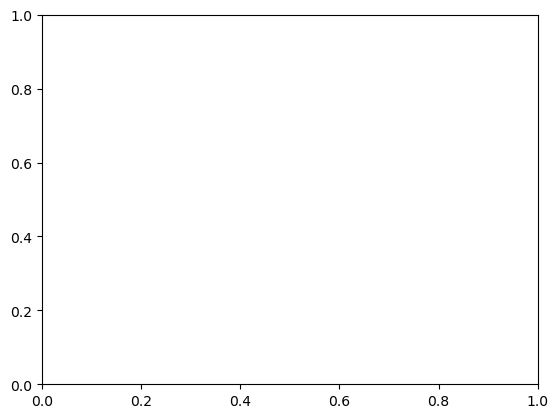

In [4]:
f, ax = plt.subplots()
print(type(f))
print(type(ax))

Let's see some nested objects

In [5]:
print(f.axes)


[<Axes: >]


In [6]:
dir(f.axes[0])

['ArtistList',
 '_AxesBase__clear',
 '_PROPERTIES_EXCLUDED_FROM_SET',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autotitlepos',
 '_axes',
 '_axes_locator',
 '_axis_map',
 '_axis_names',
 '_axisbelow',
 '_box_aspect',
 '_callbacks',
 '_check_no_units',
 '_children',
 '_clipon',
 '_clippath',
 '_cm_set',
 '_colorbars',
 '_convert_dx',
 '_current_image',
 '_different_canvas',
 '_errorevery_to_mask',
 '_facecolor',
 '_fill_between_x_or_y',
 '_frameon',
 '_fully_clipped_to_axes',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spine

Let's see axes[x,y] property

In [7]:
print(type(f.axes[0].xaxis))

<class 'matplotlib.axis.XAxis'>


In [8]:
print(type(f.axes[0].xaxis.get_major_ticks()[0]))
print(type(f.axes[0].xaxis.majorTicks[0]))
print(type(f.axes[0].xaxis.label))

<class 'matplotlib.axis.XTick'>
<class 'matplotlib.axis.XTick'>
<class 'matplotlib.text.Text'>


# plt(pyplot) interface
function in plt operate on current figure , axes or creating one if it doesn't exists.

Figure(640x480)
Axes(0.125,0.11;0.775x0.77)


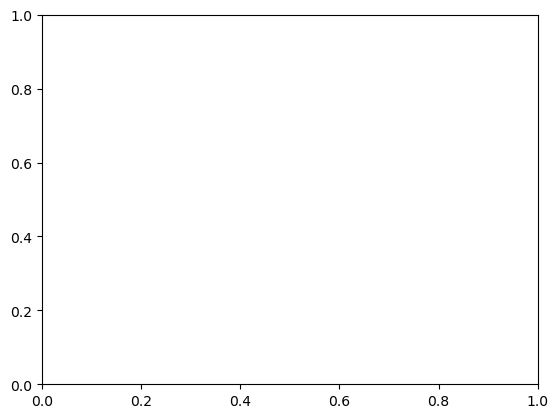

In [9]:
print(plt.gcf())
print(plt.gca())


# An example

Text(0.5, 1.0, 'sin(x)')

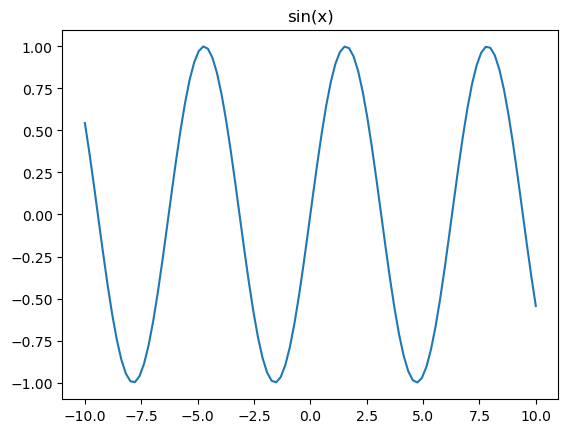

In [10]:
import numpy as np
x = np.linspace(-10,10,100)
plt.plot(x, np.sin(x))
plt.title('sin(x)')

see how plot operates on current axes

- plot 
https://github.com/matplotlib/matplotlib/blob/e0d31298647954cffcb415fbf87f0332e711aed5/lib/matplotlib/pyplot.py#L2771

- title
https://github.com/matplotlib/matplotlib/blob/e0d31298647954cffcb415fbf87f0332e711aed5/lib/matplotlib/pyplot.py#L3039

# plot revisit
plotting x vs y as line or marker

## Let's explicitly create figure and axes


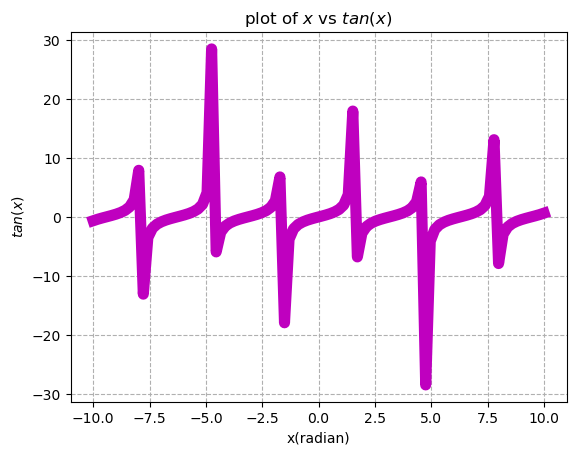

In [11]:
f, ax = plt.subplots()
ax.plot(x, np.tan(x), 'm-', lw=8)
ax.set_title('plot of $x$ vs $tan(x)$')
ax.set_xlabel('x(radian)')
ax.set_ylabel('$tan(x)$')
ax.grid(which='major', axis='both', linestyle='--')



What happened here
- subplots created a figure and a axes
- used ax for 
    + plot created line plot with line property(color red and style --)
    + set labels
    + set grid

# hist plot

[ 5.39692261  5.84563402  6.29434543  6.74305684  7.19176825  7.64047966
  8.08919107  8.53790248  8.98661389  9.4353253   9.88403671 10.33274812
 10.78145953 11.23017094 11.67888235 12.12759376 12.57630517 13.02501658
 13.47372799 13.9224394  14.37115081]
[0.02228604 0.04457208 0.         0.02228604 0.02228604 0.1114302
 0.15600227 0.22286039 0.22286039 0.20057435 0.20057435 0.24514643
 0.17828831 0.13371623 0.13371623 0.13371623 0.02228604 0.08914416
 0.02228604 0.04457208]


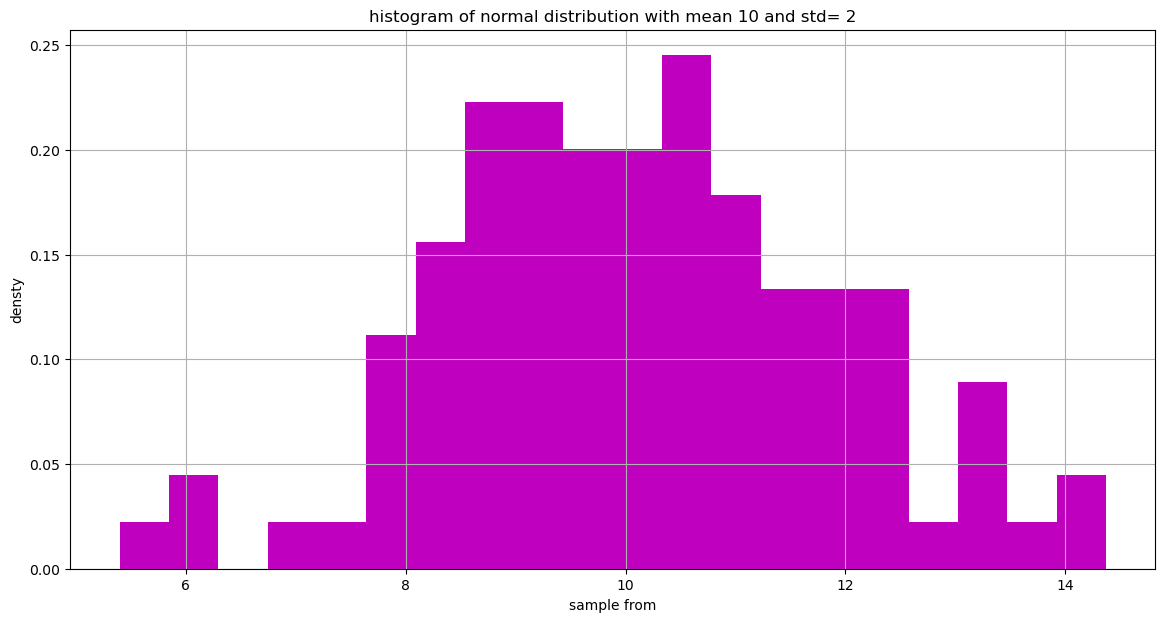

In [12]:
import numpy as np
np.random.seed(1)
mu =10
std=2
y1 = 2*np.random.randn(100) + mu

f, ax = plt.subplots( figsize=(14 ,7))
n, bins, patches=ax.hist(y1, bins=20, color='m', density=True)
ax.set_title('histogram of normal distribution with mean {} and std= {}'.format(mu, std))
ax.set_xlabel('sample from')
ax.set_ylabel('densty')
ax.grid(which='major', axis='both', linestyle='-')

print(bins)
print(n)

# Let's draw expected distribution

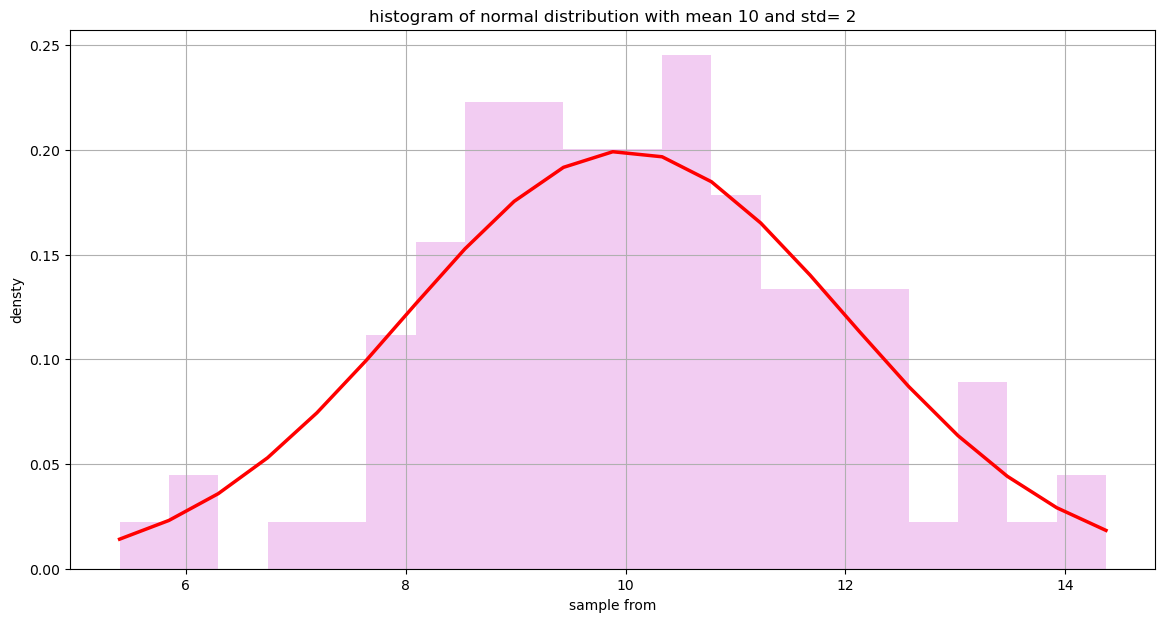

In [13]:
from scipy.stats import norm

np.random.seed(1)
mu =10
std=2
y1 = 2*np.random.randn(100) + mu


f, ax = plt.subplots( figsize=(14 ,7))
n, bins, patches=ax.hist(y1, bins=20, color='m', density= True,alpha= .2)
y_density = norm.pdf(bins, mu, std)

ax.plot(bins, y_density, 'r-', linewidth=2.5)
ax.set_title('histogram of normal distribution with mean {} and std= {}'.format(mu, std))
ax.set_xlabel('sample from')
ax.set_ylabel('densty')
ax.grid(True)


# note: bins are half open intervals [   ) except last which is closed interval

## scatter and hist plot

(100,)
(100, 2)


Text(0.5, 1.0, 'x1 and x2 histogram')

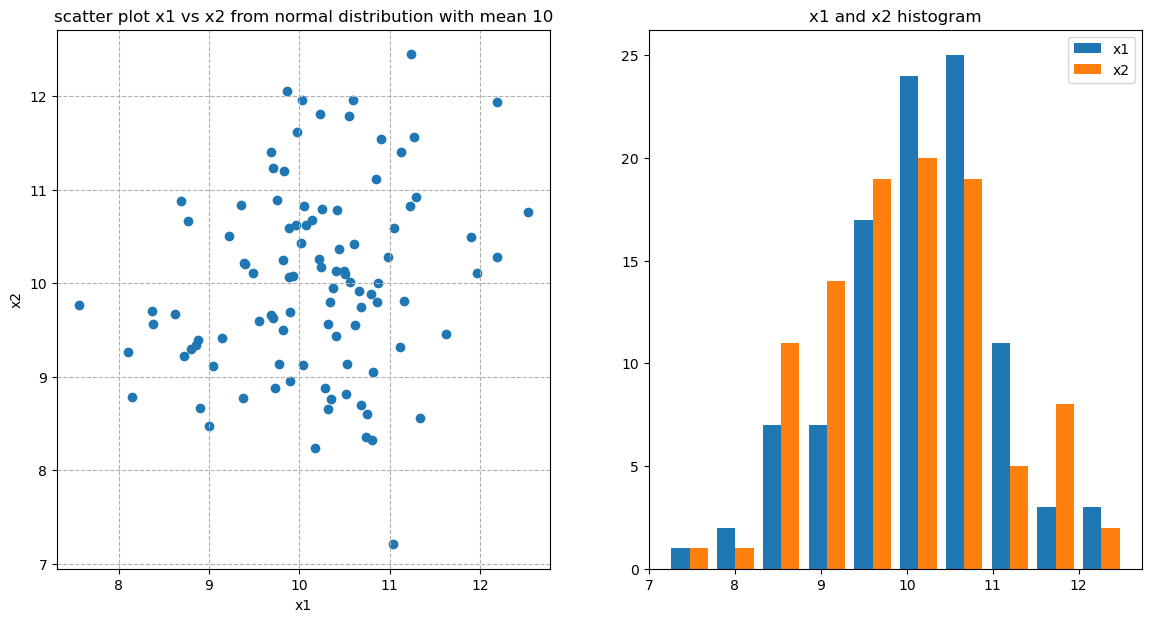

In [14]:
# Try stacked option
mu =10
x1 = np.random.randn(100) + mu
x2 = np.random.randn(100) + mu

print(x1.shape)
x_vstacked = np.column_stack((x1,x2))
                             
print(x_vstacked.shape)
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(14 ,7))
ax[0].scatter(x1, x2, marker= 'o')
ax[0].set_title('scatter plot x1 vs x2 from normal distribution with mean {}'.format(mu))
ax[0].set_xlabel('x1')
ax[0].set_ylabel('x2')
ax[0].grid(which='major', axis='both', linestyle='--')

ax[1].hist(x_vstacked, bins =10, label=('x1', 'x2'))

ax[1].legend(loc='upper right')

ax[1].set_title('x1 and x2 histogram')



In [17]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
x = np.linspace(0, 2*np.pi, 200)
y = np.sin(x*2)+np.sin(x*3)

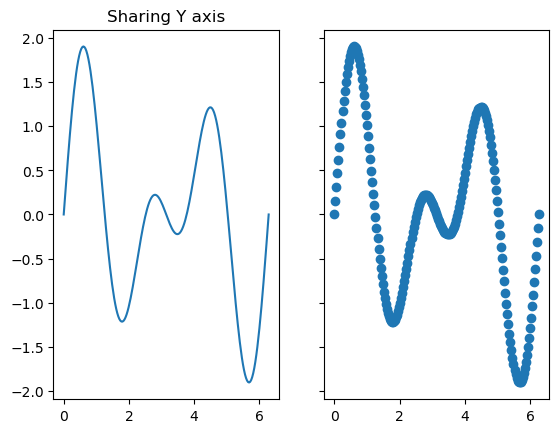

In [18]:
f, (ax1, ax2) = plt.subplots(1,2, sharey=True)
ax1.plot(x,y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x,y)

# More subplots customization gridspec
## Let's use data from

http://data.opencolorado.org/dataset/city-and-county-of-denver-real-property-apartment-and-commercial-characteristics

In [21]:
import pandas as pd

In [22]:
!curl -O https://www.denvergov.org/media/gis/DataCatalog/real_property_apartment_and_commercial_characteristics/csv/real_property_apartment_and_commercial_characteristics.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 10 11.0M   10 1232k    0     0   843k      0  0:00:13  0:00:01  0:00:12  849k
 24 11.0M   24 2720k    0     0  1107k      0  0:00:10  0:00:02  0:00:08 1111k
 37 11.0M   37 4208k    0     0  1218k      0  0:00:09  0:00:03  0:00:06 1221k
 53 11.0M   53 6032k    0     0  1352k      0  0:00:08  0:00:04  0:00:04 1355k
 68 11.0M   68 7728k    0     0  1415k      0  0:00:07  0:00:05  0:00:02 1595k
 83 11.0M   83 9376k    0     0  1452k      0  0:00:07  0:00:06  0:00:01 1629k
 97 11.0M   97 10.7M    0     0  1471k      0  0:00:07  0:00:07 --:--:-- 1651k
100 11.0M  100 11.0M    0     0  1468k      0  0:00:07  0:00:07 --:--:-- 1673k


In [23]:
p_df = pd.read_csv('real_property_apartment_and_commercial_characteristics.csv', encoding = "ISO-8859-1")

In [24]:
p_df

,PARID,CD,OFCARD,OWNER,CO_OWNER,OWNER_NUM,OWNER_DIR,OWNER_ST,OWNER_TYPE,OWNER_APT,...,ASMT_APPR_LAND,TOTAL_VALUE,ASMT_LAND,ASSESS_VALUE,ASMT_TAXABLE,ASMT_EXEMPT_AMT,TOT_UNITS,NBHD_CD,NBHD_1_CN,LEGL_DESCRIPTION
0,1100001000,1,0.0,CITY & COUNTY OF DENVER,NaN,201.0,W,COLFAX,AVE,401,...,45800.0,45800.0,12780.0,12780.0,0.0,12780.0,NaN,4,GATEWAY N,T3 R66 S1 BEG NW COR E 5287.84FT S 1508.13FT W...
1,2100002000,1,0.0,CITY & COUNTY OF DENVER,NaN,201.0,W,COLFAX,AVE,401,...,20800.0,20800.0,5800.0,5800.0,0.0,5800.0,NaN,4,GATEWAY N,T3 R66 S2 NW/4 EXC PT IN ADAMS COUNTY
2,2100003000,1,0.0,CITY & COUNTY OF DENVER,NaN,201.0,W,COLFAX,AVE,401,...,20800.0,20800.0,5800.0,5800.0,0.0,5800.0,NaN,4,GATEWAY N,T3 R66 S2 NE/4 EXC PT TO ADAMS COUNTY
3,3100012000,1,1.0,CITY & COUNTY OF DENVER,NaN,201.0,W,COLFAX,AVE,401,...,137200.0,138200.0,38280.0,38560.0,0.0,38560.0,NaN,4,GATEWAY N,T3 R66 S3 BEG 70FT E OF NW COR S3 E 933.31FT S...
4,3100025000,1,2.0,MENIFEE MART INC,NaN,10174.0,NaN,OLD GROVE,RD,200,...,2024000.0,9508600.0,556330.0,2644530.0,2644530.0,0.0,NaN,4,GATEWAY N,T3 R66 S3 NW/4 PART COM SELY MOST COR 69TH ROW...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28862,1306100011000,1,0.0,CITY & COUNTY OF DENVER,NaN,201.0,W,COLFAX,AVE,401,...,22900.0,22900.0,6390.0,6390.0,0.0,6390.0,NaN,4,GATEWAY N,T3 R65 S6 BEG NE COR S 1513.95 FT W 2639.57FT ...
28863,1306100012000,1,0.0,CITY & COUNTY OF DENVER,NaN,201.0,W,COLFAX,AVE,401,...,22400.0,22400.0,6250.0,6250.0,0.0,6250.0,NaN,4,GATEWAY N,T3 R65 S6 BEG NW COR S 1513.95 FT W 2583.48FT ...
28864,1407200002000,1,0.0,CITY & COUNTY OF DENVER,NaN,201.0,W,COLFAX,AVE,401,...,100.0,100.0,30.0,30.0,0.0,30.0,NaN,4,GATEWAY N,T2 R64 S7 BEG SW COR OF SD SEC N 2634.96FT E 8...
28865,1407200003000,1,0.0,CITY & COUNTY OF DENVER,NaN,201.0,W,COLFAX,AVE,401,...,100.0,100.0,30.0,30.0,0.0,30.0,NaN,4,GATEWAY N,T2 R64 S7 BEG SW COR OF SD SEC N 2634.96FT TO ...


In [25]:
# only select TOT_UNITS not zero and TAX_DIST DENVER
pu_df = p_df[(p_df.TOT_UNITS !=0) &  (p_df.TAX_DIST == 'DENVER')]

In [26]:
pu_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PARID                0 non-null      int64  
 1   CD                   0 non-null      int64  
 2   OFCARD               0 non-null      float64
 3   OWNER                0 non-null      object 
 4   CO_OWNER             0 non-null      object 
 5   OWNER_NUM            0 non-null      float64
 6   OWNER_DIR            0 non-null      object 
 7   OWNER_ST             0 non-null      object 
 8   OWNER_TYPE           0 non-null      object 
 9   OWNER_APT            0 non-null      object 
 10  OWNER_CITY           0 non-null      object 
 11  OWNER_STATE          0 non-null      object 
 12  OWNER_ZIP            0 non-null      object 
 13  SITE_NBR             0 non-null      float64
 14  SITE_DIR             0 non-null      object 
 15  SITE_NAME            0 non-null      object 
 16  SITE_MO

Let us plot 
- TOTL_SQFT, TOT_UNITS and color code with price ASMT_TOT
- Histogram of TOT_UNITS
- Histogram of TOT_UNITS



In [27]:
# print number of non null value in each colums
pu_df.isnull().sum()

PARID                  0
CD                     0
OFCARD                 0
OWNER                  0
CO_OWNER               0
OWNER_NUM              0
OWNER_DIR              0
OWNER_ST               0
OWNER_TYPE             0
OWNER_APT              0
OWNER_CITY             0
OWNER_STATE            0
OWNER_ZIP              0
SITE_NBR               0
SITE_DIR               0
SITE_NAME              0
SITE_MODE              0
SITE_MORE              0
TAX_DIST               0
PROP_CLASS_LAND        0
PROP_CLASS_IMPS        0
PROPERTY_CLASS_DESC    0
BLD_NAME               0
GROSS_AREA             0
NET_AREA               0
BSMT_AREA              0
FBSMT_SQFT             0
NO_FLOORS              0
TOTL_SQFT              0
ZONE10                 0
D_CLASS_CN             0
ORIG_YOC               0
REMODEL                0
ASMT_APPR_LAND         0
TOTAL_VALUE            0
ASMT_LAND              0
ASSESS_VALUE           0
ASMT_TAXABLE           0
ASMT_EXEMPT_AMT        0
TOT_UNITS              0


In [28]:
# can you drop na in TOTL_SQFT
pu_df.dropna(subset= ['TOTL_SQFT'], inplace=True)

C:\Users\KOSEK\AppData\Local\Temp\ipykernel_29052\1040445502.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pu_df.dropna(subset= ['TOTL_SQFT'], inplace=True)


In [29]:
pu_df.isnull().sum()

PARID                  0
CD                     0
OFCARD                 0
OWNER                  0
CO_OWNER               0
OWNER_NUM              0
OWNER_DIR              0
OWNER_ST               0
OWNER_TYPE             0
OWNER_APT              0
OWNER_CITY             0
OWNER_STATE            0
OWNER_ZIP              0
SITE_NBR               0
SITE_DIR               0
SITE_NAME              0
SITE_MODE              0
SITE_MORE              0
TAX_DIST               0
PROP_CLASS_LAND        0
PROP_CLASS_IMPS        0
PROPERTY_CLASS_DESC    0
BLD_NAME               0
GROSS_AREA             0
NET_AREA               0
BSMT_AREA              0
FBSMT_SQFT             0
NO_FLOORS              0
TOTL_SQFT              0
ZONE10                 0
D_CLASS_CN             0
ORIG_YOC               0
REMODEL                0
ASMT_APPR_LAND         0
TOTAL_VALUE            0
ASMT_LAND              0
ASSESS_VALUE           0
ASMT_TAXABLE           0
ASMT_EXEMPT_AMT        0
TOT_UNITS              0


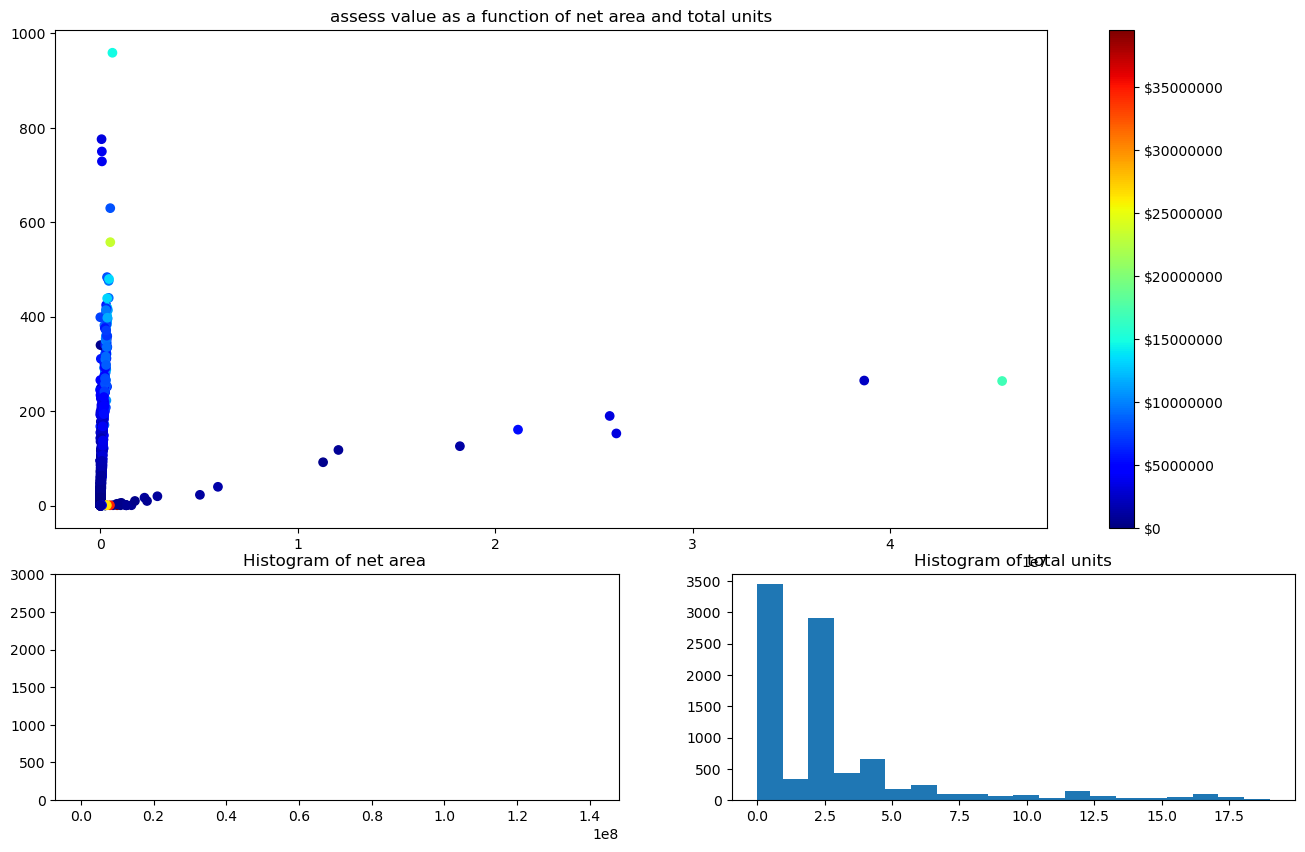

In [30]:
# This took almost 7 minutes on my system (WK)
gs = (3,2)
fig = plt.figure(figsize=(16, 10))
ax1 = plt.subplot2grid(gs, (0, 0), colspan=2, rowspan=2)
ax1.set_title('assess value as a function of net area and total units')
ax2 = plt.subplot2grid(gs, (2, 0))
ax2.set_title('Histogram of net area ')
ax3 = plt.subplot2grid(gs, (2, 1))
ax2.hist(p_df.NET_AREA, bins='auto')
ax3.hist(p_df.TOT_UNITS[p_df.TOT_UNITS < 20], bins =20)
ax3.set_title('Histogram of total units')

sct= ax1.scatter(x= p_df.NET_AREA,y = p_df.TOT_UNITS  ,c=p_df.ASSESS_VALUE, cmap=plt.cm.jet)
plt.colorbar(sct, ax=ax1, format='$%d')

List of plots

- https://matplotlib.org/api/axes_api.html?highlight=axes%20class#plotting

# Lecture 7.3:  imshow

# Heatmap example

In [207]:
samples = 1024
x = np.random.randn(samples)
y = np.random.randn(samples)

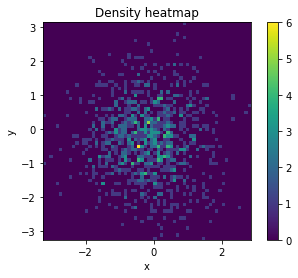

In [211]:
heatmap, xedges, yedges = np.histogram2d(x, y, bins=(64,64))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
 
plt.title('Density heatmap')
plt.ylabel('y')
plt.xlabel('x')

plt.imshow(heatmap, extent=extent)
plt.colorbar()


# Plotting correlation

In [3]:
df= pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', header= None)

In [4]:
df.head(10)

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [5]:
# Let's check data types
df.dtypes

0     object
1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
7    float64
8      int64
dtype: object

In [8]:
# I removed the first column in order for the next cell to work properly
df = df.drop(0, axis=1)

C:\Users\KOSEK\AppData\Local\Temp\ipykernel_24936\1567426274.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels,fontsize=6)
C:\Users\KOSEK\AppData\Local\Temp\ipykernel_24936\1567426274.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(labels,fontsize=6)


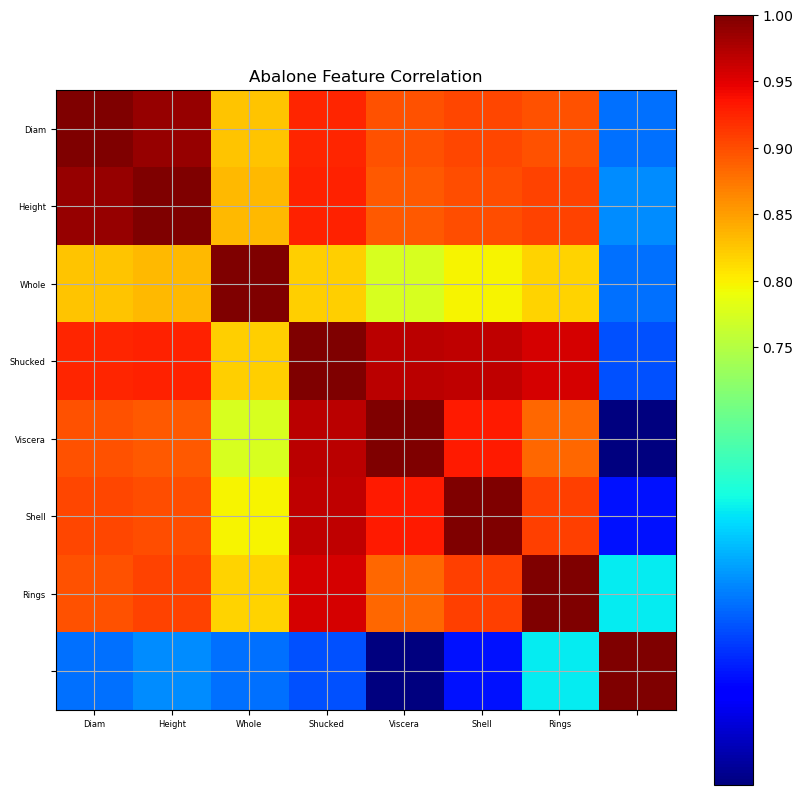

In [13]:
f, ax1 = plt.subplots(figsize=(10, 10))

cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=plt.cm.jet)
ax1.grid(True)
plt.title('Abalone Feature Correlation')
labels=['Length','Diam','Height','Whole','Shucked','Viscera','Shell','Rings',]
ax1.set_xticklabels(labels,fontsize=6)
ax1.set_yticklabels(labels,fontsize=6)

f.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])

# seaborn
Seaborn is a Python data visualization library based on matplotlib.

In [ ]:
!pip install --upgrade seaborn

# statistical relationships

In [17]:
import seaborn as sns
sns.__version__

'0.13.0'

In [18]:
sns.set(style="darkgrid")


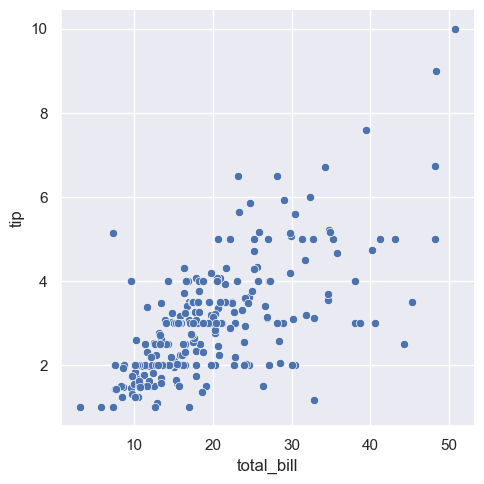

In [19]:
# scatter
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", data=tips);

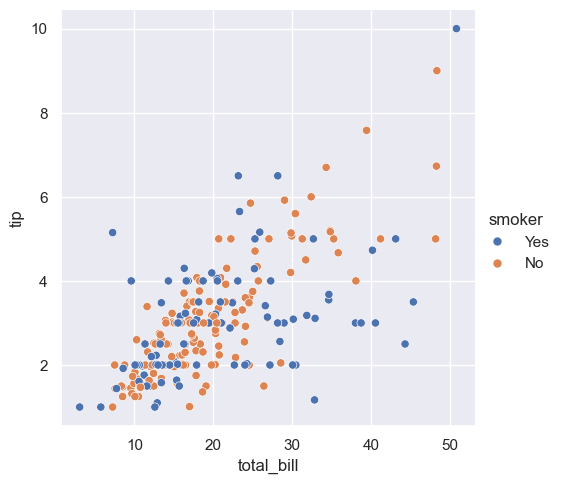

In [20]:
# 3 variable using hue
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

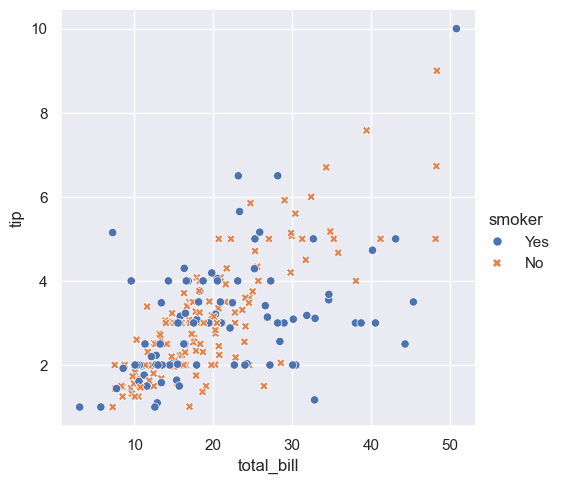

In [21]:
# 3 variable, different marker
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker",
            data=tips);

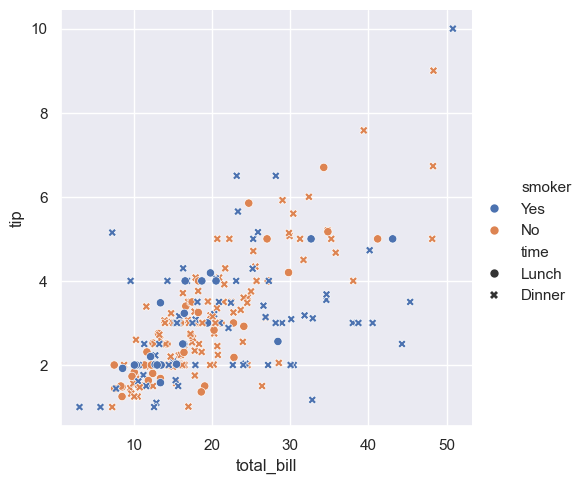

In [22]:
# 4
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips);

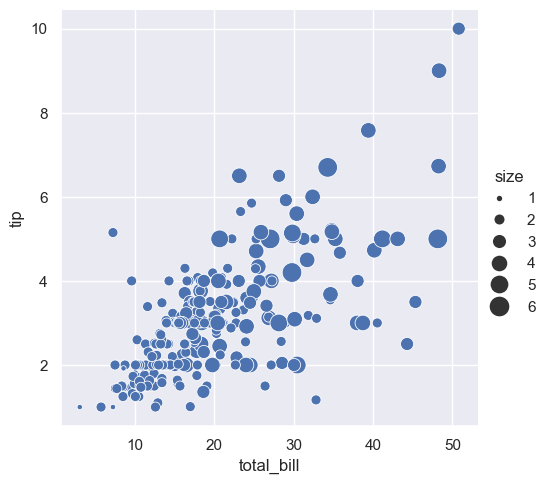

In [23]:
# controlling size
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips);

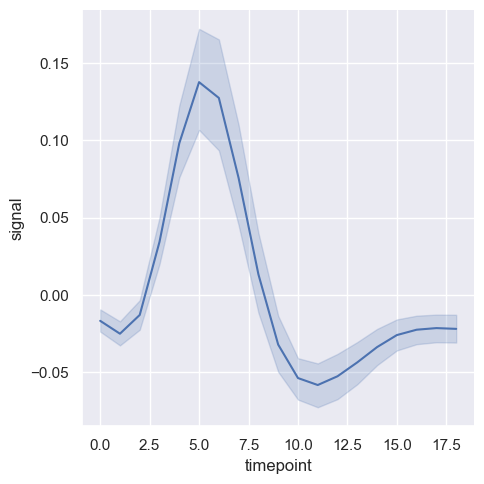

In [24]:
# multiple measurements
fmri = sns.load_dataset("fmri")
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri);

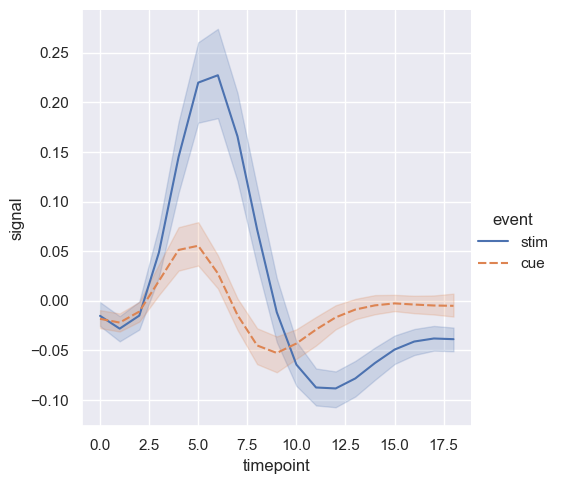

In [25]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            kind="line", data=fmri);

# Date

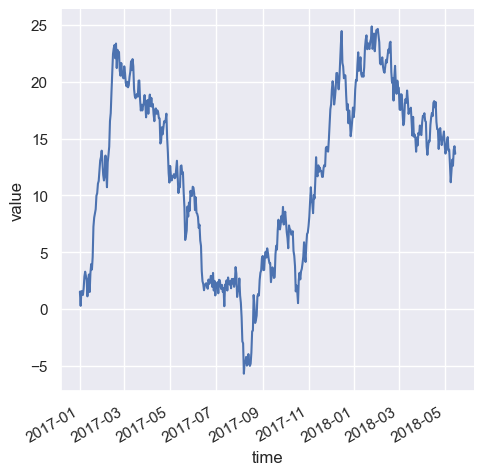

In [26]:
df = pd.DataFrame(dict(time=pd.date_range("2017-1-1", periods=500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()